Bayesian Optimization
-----
<br>
<center><img src="http://hips.seas.harvard.edu/files/gp-acquisition-ei.png" width="700"/></center>

By The End Of This Session You Should Be Able To:
----

- Define Bayesian Optimization
- Explain how Bayesian Optimization uses Gaussian Process
- List the steps in Bayesian Optimization
- Explain how Bayesian Optimization can be used to find hyperparameters for machine learning models

Choosing the right (hyper)parameters for a machine learning model is almost more of an art than a science.

What are the ways of tuning model hyperparameters?
-----

- Closed-form Optimization
- Gradient Descent
- "Graduate Student" Descent, aka manual search
- Random
- Grid Search
- Genetic Programming
- Bayesian Optimization


What is the best use case for Bayesian Optimization (BO)?
-----

Impossible to have closed-form solution to find optimum.

Costly to evaluate the function.

How does BO work?
----

An example of sequential model-based optimization (SMBO) algorithms.

Use previous observations of the loss f to determine the next best point to sample f. 

How does BO work?
----

1) Build Gaussian Process (GP) with points sampled so far


2) Optimize the fit of the GP (covariance hyperparameters)


3) Find the point(s) of highest Expected Improvement within parameter domain


4) Return optimal next best point(s) to sample

Check for understanding
-----

In general for Bayesian inference, what are the two things we need to generate a posterior expectation?

1. A likelihood model for the samples 

2. A prior probability model

Creating a BO model
------

Assume we have a normal likelihood with noise:  
y = f(__x__) + ε, ε ~ N(f(__x__), σ<sup>2</sup><sub>ε</sub>)

or in Bayesian terms:  
y | f ~ N(f(__x__), σ<sup>2</sup><sub>ε</sub>)

For the prior distribution, we assume that the loss function f can be described by a Gaussian process (GP). 

What the hell is a Gaussian process (GP)?
------
<br>
<center><img src="images/gp.png" width="700"/></center>

GP is the generalization of a standard Gaussian distribution

GP is a __distribution over functions__ (Gaussian distribution is a distribution over random variables)

GP parameters
-----

A Gaussian distribution is completely specified by its mean and variance

A GP is completely specified by its mean __function__ m(__x__), and covariance __function__ k(__x__,__x′__).

GP: Points go in, Normal Distributions come out
-----

<br>
<center><img src="images/gp.png" width="700"/></center>

We can think of a GP as a function that, instead of returning a scalar f(x), returns __the mean and variance__ of a normal distribution over the possible values of f at x.


GP formalism
------

For a set of data points x<sub></sub>1:n<sub></sub> = {x<sub>1</sub>,…,x<sub>n</sub>}x1:n={x1,…,xn},   
we assume that the values of the loss function f<sub>1:n</sub>={f(x<sub>1</sub>),…,f(x<sub>n</sub>)} can be described by a multivariate Gaussian distribution:

f<sub>1:n</sub> ∼ N(m(x<sub>1:n</sub>), K)

GP FTW
-----

<center><img src="images/after.png" width="700"/></center>

It results in a posterior distribution over the loss function that is analytically tractable. This allows us to update our beliefs of what f looks like, after we have computed the loss for a new set of hyperparameters.

Acquisition functions
------

To find the best point to sample ff next from, we will choose the point that maximizes an acquisition function. 

This is a function of the posterior distribution over f, that describes the utility for all values of the hyperparameters. 

The values with the highest utility, will be the values for which we compute the loss next.

Expected Improvement (EI) function
-----

The most popular acquisition function

<center><img src="images/ei_form.png" width="800"/></center>

EI properties
-------

1. EI is high when the (posterior) expected value of the loss μ(x) is higher than the current best value f(x̂ )
2. EI is high when the uncertainty σ(x) around the point x is high.

Trades off exploitation versus exploration:

We maximize the expected improvement, we will either sample from points for which we expect a higher value of f, or points in a region of f we have not explored yet (σ(x) is high)

<center><img src="http://www.nature.com/nature/journal/v521/n7553/images/nature14541-f3.jpg" width="800"/></center>

EI Example: Early in Training
-------
<br>
<center><img src="images/ep1.png" width="500"/></center>

"Unknown Unknowns": A single know value and high variances

EI Example: Later in Training
-------
<br>
<center><img src="images/ep.png" width="650"/></center>

Known optimium values with low variance.

Check for understanding
------

When do you stop Bayesian optimization?

1. When you get a good answer with high confidence
2. Pre-specified number of iterations
3. Run out of budget

Bayesian optimization steps
------

1) Given observed values f(x), update the posterior expectation of f using the GP model


2) Find x<sub>new</sub> that maximises the EI: x<sub>new</sub> = argmaxEI(x)

3) Compute the value of f for the point x<sub>new</sub>

BO results
-----

<center><img src="http://scikit-learn.org/0.17/_images/plot_gp_regression_0011.png" width="700"/></center>

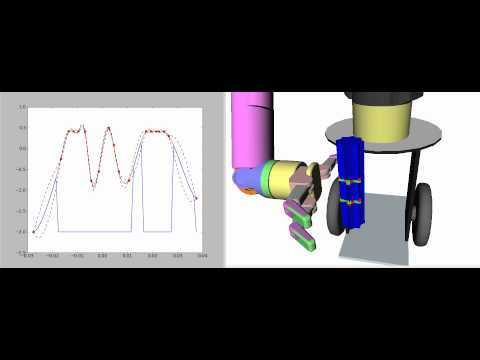

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("R3wIEzkv4Pg")

Tips and tricks
-----

Unfortunately, it is not always that easy to get such good results with Bayesian optimization.




1) Choose an appropriate scale for your hyperparameters: 

For parameters like a learning rate, or regularization term, it makes more sense to sample on the log-uniform domain, instead of the uniform domain.

2) Kernel of the GP 


Different kernels have a drastic effect on the performance of the search algorithm. Each kernel implicitly assumes different properties on the loss ff, in terms of differentiability and periodicity.

3) Uniqueness of sampled hyperparameters

Sampled hyperparameters that are close to each other, reduce the condinitioning of the problem. A solution is to add jitter (noise) to the diagonal of the covariance matrix. 

Summary
------

- Bayesian Optimization (BO) is a method for efficient search of a space
- BO uses a Gaussian Process (GP)
- GP extend Gaussian Distributions to be functions
- The level of uncertainty in the spaces that reduce through sampling
- We pick the next best place to sample with Expected Improvement (EI) function, which balances best outcomes and reducing uncertainty
- BO is still immature (i.e., tricky) in application

<br>

Bonus Material
---

Other Activation Functions
------
<br>
<center><img src="images/act.png" width="700"/></center>

<br>
<br>